#### Importing Packages and Reading the Datasets

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
demo = pd.read_csv('PerformanceTask_Demographics.csv')
perf = pd.read_excel('PerformanceTask_MAP.xlsx', sheet_name=0)

#### Merging the performance and demographics datasets

In [3]:
final_dataset = perf.merge(demo[['StudentID', 'Gender', 'RaceEthnicity']], on = 'StudentID')

#### Question 1

In [4]:
question_1_rows = final_dataset[
    (final_dataset['GradeID'].isin([3, 4, 5])) &
    (final_dataset['AcademicSubject'] == 'Reading') &
    (final_dataset['Gender'] == 'Male') &
    ((final_dataset['RaceEthnicity'] == 'Black/African American') | 
    (final_dataset['RaceEthnicity'] == 'African American'))]

In [5]:
question_1_rows

,AcademicYear,StudentID,StudentMAPTestID,TestAdminCode,TestAdminName,SchoolCode,SchoolName,GradeID,GradeCode,GradeName,...,PercentileRank,PercentCorrect,TypicalGrowth,ActualGrowth,ExpectedGrowth,MetGrowth,AcademicSubject,SeasonName,Gender,RaceEthnicity
437,2018-19,6465584,7120265,2019_S,Spring 2019,226,Bailey Gatzert Elementary,5,5,5th grade,...,22,53,15.0,25,20,1,Reading,Spring,Male,African American
639,2018-19,3655713,7130426,2019_S,Spring 2019,939,Orca K-8 School,5,5,5th grade,...,28,49,23.0,21,21,1,Reading,Spring,Male,African American
779,2018-19,3204743,7120379,2019_S,Spring 2019,226,Bailey Gatzert Elementary,4,4,4th grade,...,19,44,15.0,21,20,1,Reading,Spring,Male,African American
794,2018-19,3194748,7140250,2019_S,Spring 2019,226,Bailey Gatzert Elementary,3,3,3rd grade,...,16,56,16.0,32,22,1,Reading,Spring,Male,African American
802,2018-19,3188748,7140252,2019_S,Spring 2019,266,John Rogers Elementary,3,3,3rd grade,...,22,51,12.0,20,17,1,Reading,Spring,Male,African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13079,2018-19,3479494,7128784,2019_S,Spring 2019,252,Maple Elementary,4,4,4th grade,...,89,52,3.0,18,8,1,Reading,Spring,Male,Black/African American
13487,2018-19,3510437,7129415,2019_S,Spring 2019,233,Hawthorne Elementary,5,5,5th grade,...,77,48,2.0,2,4,0,Reading,Spring,Male,Black/African American
13579,2018-19,3349437,7129491,2019_S,Spring 2019,264,Rainier View Elementary,5,5,5th grade,...,89,54,3.0,10,7,1,Reading,Spring,Male,Black/African American
13618,2018-19,3028437,7147775,2019_S,Spring 2019,226,Bailey Gatzert Elementary,3,3,3rd grade,...,99,88,2.0,7,4,1,Reading,Spring,Male,Black/African American


In [6]:
question_1_rows['MetGrowth'].mean()

0.45454545454545453

#### Question 2

In [7]:
question_2_rows = perf[
    (perf['GradeID'].isin([6, 7, 8])) &
    (perf['AcademicSubject'] == 'Mathematics')
]

question_2_rows['above_50'] = np.where(question_2_rows['PercentileRank'] >= 50, 1, 0)

/var/folders/6r/qzynl1d55f5_wpk2q01r5pbw0000gn/T/ipykernel_69148/3917102713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_2_rows['above_50'] = np.where(question_2_rows['PercentileRank'] >= 50, 1, 0)


In [8]:
question_2_rows[['SchoolName', 'PercentileRank', 'above_50']].groupby(by = 'SchoolName').agg(
    PercAbove50=('above_50', np.mean),
    StudentsAbove50=('above_50', np.sum),
    TotalStudents = ('above_50', 'count')).sort_values(by = 'PercAbove50')

,PercAbove50,StudentsAbove50,TotalStudents
SchoolName,,,
Mercer International Middle School,0.203065,106,522
McClure Middle School,0.229935,106,461
Eckstein Middle School,0.241379,7,29
Jane Addams Middle School,0.272727,6,22


#### Question 3

In [9]:
question_3_rows = final_dataset[
    (final_dataset['GradeID'].isin([0, 1, 2])) &
    (final_dataset['AcademicSubject'] == 'Reading')]

In [51]:
question_3_table = question_3_rows.groupby(by = 'RaceEthnicity').agg(PercMetGrowth = ('MetGrowth', np.mean)).sort_values(by = 'PercMetGrowth').reset_index()

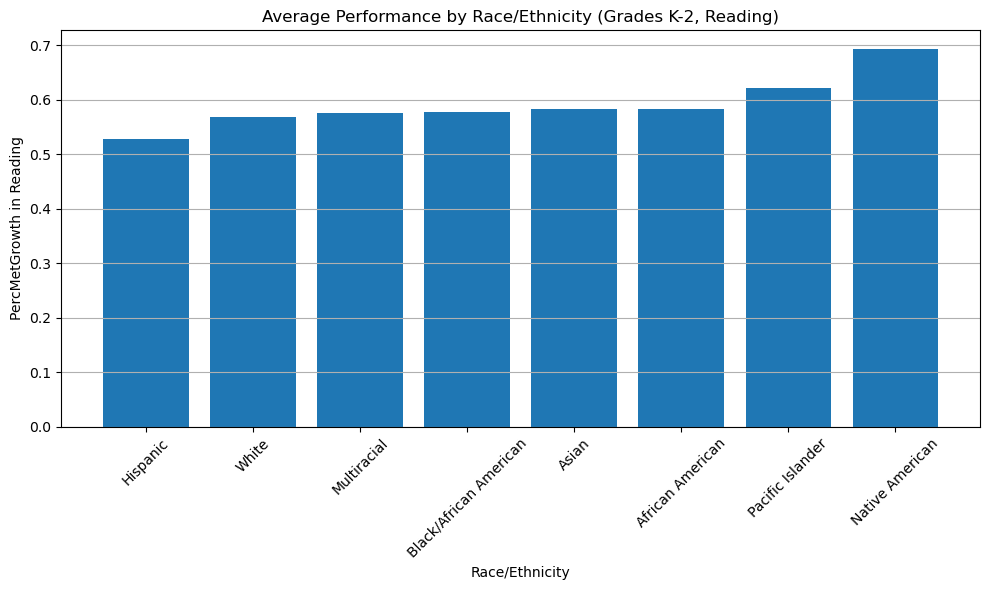

In [56]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df['race'] contains race information
# df['performance'] contains performance information



# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(question_3_table['RaceEthnicity'], question_3_table['PercMetGrowth'])

# Add labels and title
plt.xlabel('Race/Ethnicity')
plt.ylabel('PercMetGrowth in Reading')
plt.title('Average Performance by Race/Ethnicity (Grades K-2, Reading)')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Question 4

In [11]:
final_dataset['StudentofColor'] = final_dataset['RaceEthnicity'].isin(['Black/African American', 'Hispanic', 'Pacific Islander', 'Native American', 'African American']).astype(int)
question_4_rows = final_dataset[final_dataset.StudentofColor == 1]

In [12]:
final_dataset['StudentofColor'].sum()

5291

In [20]:
student_counts = question_4_rows.groupby(by='StudentID').count().reset_index()[['StudentID', 'AcademicYear']].rename(columns = {'AcademicYear': 'StudentCount'})

merged = question_4_rows.merge(student_counts, on = 'StudentID')
two_scores = merged[merged['StudentCount'] == 2].sort_values(by = 'StudentID')

two_scores_reading = two_scores[two_scores['AcademicSubject'] == 'Reading'][['StudentID', 'MetGrowth']].rename(columns = {'MetGrowth':
                                                                                                                              'MetGrowthReading'})
two_scores = two_scores[two_scores['AcademicSubject'] == 'Mathematics'].rename(columns = {'MetGrowth':
                                                                'MetGrowthMath'})

two_scores_merged = two_scores.merge(two_scores_reading, on = 'StudentID')

two_scores_merged['BothMetGrowth'] = (two_scores_merged['MetGrowthReading'] & two_scores_merged['MetGrowthMath']).astype(int)


In [23]:
two_scores_merged

,AcademicYear,StudentID,StudentMAPTestID,TestAdminCode,TestAdminName,SchoolCode,SchoolName,GradeID,GradeCode,GradeName,...,ExpectedGrowth,MetGrowthMath,AcademicSubject,SeasonName,Gender,RaceEthnicity,StudentofColor,StudentCount,MetGrowthReading,BothMetGrowth
0,2018-19,3001453,7141744,2019_S,Spring 2019,275,Rising Star Elementary,1,1,1st grade,...,16,1,Mathematics,Spring,Female,Hispanic,1,2,0,0
1,2018-19,3001483,7143977,2019_S,Spring 2019,261,Olympic Hills Elementary,1,1,1st grade,...,14,0,Mathematics,Spring,Male,Black/African American,1,2,0,0
2,2018-19,3001485,7126757,2019_S,Spring 2019,207,Martin Luther King Jr. Elementary,0,0,Kindergarten,...,12,1,Mathematics,Spring,Male,Black/African American,1,2,1,1
3,2018-19,3002450,7133717,2019_S,Spring 2019,226,Bailey Gatzert Elementary,2,2,2nd grade,...,15,1,Mathematics,Spring,Female,Black/African American,1,2,0,0
4,2018-19,3002748,7120400,2019_S,Spring 2019,268,Sacajawea Elementary,2,2,2nd grade,...,9,0,Mathematics,Spring,Female,African American,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,2018-19,3999492,7127254,2019_S,Spring 2019,277,View Ridge Elementary,2,2,2nd grade,...,11,1,Mathematics,Spring,Male,Hispanic,1,2,0,0
1695,2018-19,6009581,7130273,2019_S,Spring 2019,236,West Seattle Elementary,4,4,4th grade,...,18,0,Mathematics,Spring,Male,Hispanic,1,2,0,0
1696,2018-19,6074599,7130286,2019_S,Spring 2019,245,Lowell Elementary,4,4,4th grade,...,17,1,Mathematics,Spring,Female,African American,1,2,1,1
1697,2018-19,6465584,7120264,2019_S,Spring 2019,226,Bailey Gatzert Elementary,5,5,5th grade,...,15,0,Mathematics,Spring,Male,African American,1,2,1,0


In [40]:
table_by_schools = two_scores_merged.groupby(by = 
                        ['SchoolName'])[['BothMetGrowth']].mean().rename(columns = {
    'BothMetGrowth': 'PercMetGrowthBoth'}).sort_values(by = 'PercMetGrowthBoth',ascending = False).head(10)

In [41]:
table_by_schools

,PercMetGrowthBoth
SchoolName,
Thornton Creek Elementary,1.000000
TOPS K-8 School,0.700000
John Stanford International School,0.666667
Gatewood Elementary,0.666667
Queen Anne Elementary,0.600000
Roxhill Elementary,0.500000
B.F. Day Elementary,0.466667
Laurelhurst Elementary,0.466667
Sand Point Elementary,0.444444


###### Alternative calculation (as described in the appendix)

In [42]:
table_by_schools = question_4_rows.groupby(by = 
                        ['SchoolName', 'AcademicSubject'])[['MetGrowth']].mean().reset_index().groupby(by = 
                        ['SchoolName'])[[
    'MetGrowth']].mean().rename(columns = {'MetGrowth':'AvgMetGrowth'}).sort_values(by = 'AvgMetGrowth',
                                                                                   ascending = False).head(10)

In [43]:
table_by_schools

,AvgMetGrowth
SchoolName,
Seattle World School,1.000000
Thornton Creek Elementary,1.000000
TOPS K-8 School,0.809091
Adams Elementary,0.750000
West Seattle High School,0.750000
Gatewood Elementary,0.722222
Laurelhurst Elementary,0.687500
John Stanford International School,0.666667
John Hay Elementary,0.651515


#### Question 5

In [57]:
student_counts = final_dataset.groupby(by='StudentID').count().reset_index()[['StudentID', 'AcademicYear']].rename(columns = {'AcademicYear': 'StudentCount'})

merged = final_dataset.merge(student_counts, on = 'StudentID')
two_scores = merged[merged['StudentCount'] == 2].sort_values(by = 'StudentID')

two_scores_reading = two_scores[two_scores['AcademicSubject'] == 'Reading'][['StudentID', 
                                                                             'MetGrowth', 'PercentileRank']].rename(columns = {'MetGrowth':
                                                                                                                              'MetGrowthReading', 
                                                                                                                              'PercentileRank':
                                                                                                                              'PercentileRankReading'})
two_scores = two_scores[two_scores['AcademicSubject'] == 'Mathematics'].rename(columns = {'MetGrowth':
                                                                'MetGrowthMath', 'PercentileRank': 'PercentileRankMath'
                                                                                         })

two_scores_merged = two_scores.merge(two_scores_reading, on = 'StudentID')

two_scores_merged['BothMetGrowth'] = (two_scores_merged['MetGrowthReading'] & two_scores_merged['MetGrowthMath']).astype(int)


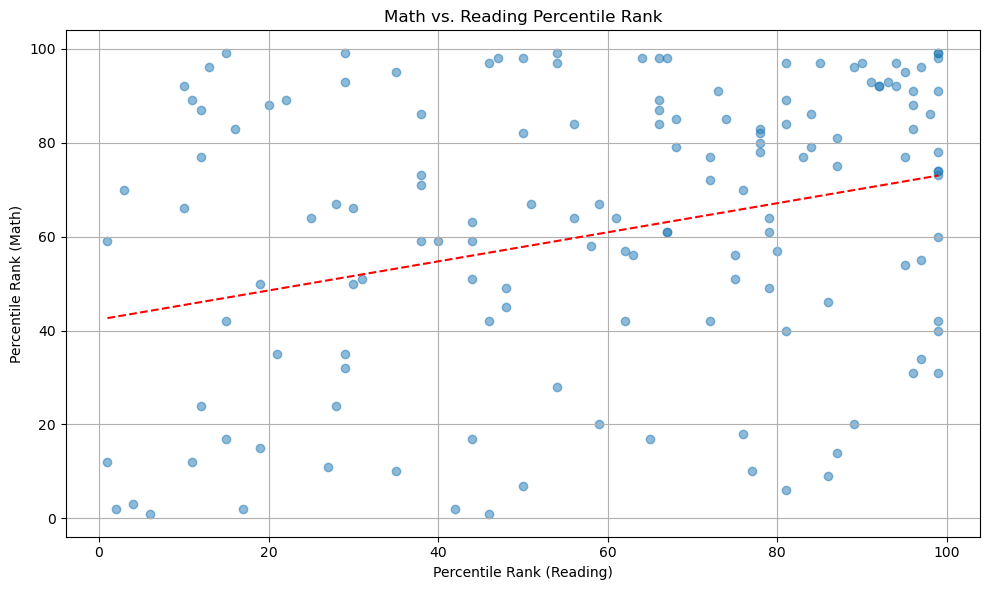

In [66]:
perc = 0.03
two_scores_merged_sub = two_scores_merged.sample(n = int(two_scores_merged.shape[0]*perc))


# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(two_scores_merged_sub['PercentileRankReading'], two_scores_merged_sub['PercentileRankMath'], alpha=0.5)

# Add labels and title
plt.xlabel('Percentile Rank (Reading)')
plt.ylabel('Percentile Rank (Math)')
plt.title('Math vs. Reading Percentile Rank')

slope, intercept, _, _, _ = linregress(two_scores_merged['PercentileRankReading'], two_scores_merged['PercentileRankMath'])
x_values = np.array([two_scores_merged['PercentileRankReading'].min(), two_scores_merged['PercentileRankReading'].max()])
y_values = slope * x_values + intercept

# Plot trend line
plt.plot(x_values, y_values, color='red', linestyle='--', label='Trend line')


# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
